In [1]:
from iqtools import *

In [12]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

In [658]:
filename='/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.08.21.18.07.820.tiq'
filename2='/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.07.06.55.25.448.tiq'
filename_min='/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.07.04.38.59.889.tiq'
filename_max='/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.07.23.54.31.735.tiq'

In [246]:
iq = get_iq_object(filename)
iq.read_samples(1)
lframes=512

time=0.3 #tdeath seconds of data                                                             
skip_time=5.025 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                         \                                                                                                      \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f]            

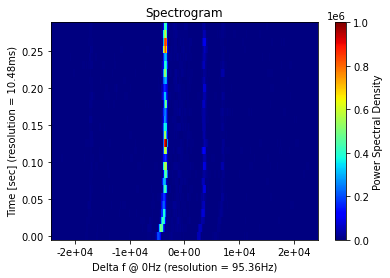

In [247]:
plot_spectrogram(xx,yy,zz)

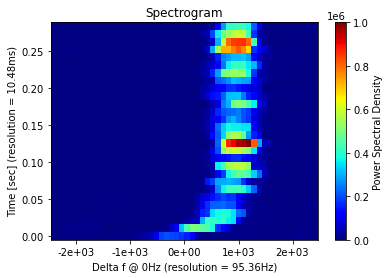

In [254]:
nxx,nyy,nzz=get_cut_spectrogram(xx,yy,zz, xcen=-4.5e3,xspan=5000)
plot_spectrogram(nxx,nyy,nzz)

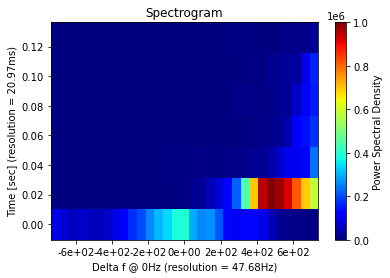

In [245]:
nnxx,nnyy,nnzz=get_cut_spectrogram(xx,yy,zz, xcen=-4.5e3,xspan=1500)
plot_spectrogram(nnxx,nnyy,nnzz)

In [174]:
axx,ayy,azz=get_averaged_spectrogram(nnxx,nnyy,nnzz, len(nnxx[:,0]))

In [175]:
np.shape(azz)

(1, 15)

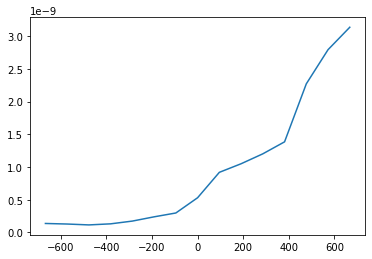

In [176]:
plt.plot(axx[0,:], azz[0,:])

In [115]:
exx,eyy,ezz=get_averaged_spectrogram(ayy,axx,azz, len(axx))


In [116]:
exx,eyy,ezz

(array([[0.38797312, 0.38797312, 0.38797312, 0.38797312, 0.38797312,
         0.38797312, 0.38797312, 0.38797312, 0.38797312, 0.38797312]]),
 array([[-429.15344238, -333.78601074, -238.4185791 , -143.05114746,
          -47.68371582,   47.68371582,  143.05114746,  238.4185791 ,
          333.78601074,  429.15344238]]),
 array([[3.19237035e-10, 3.47027888e-10, 3.76168947e-10, 4.16059931e-10,
         6.26106309e-10, 7.47594534e-10, 8.43374892e-10, 9.06203983e-10,
         1.54228914e-09, 2.61084102e-09]]))

In [122]:
np.average(azz[0,:])

8.734903683981228e-10

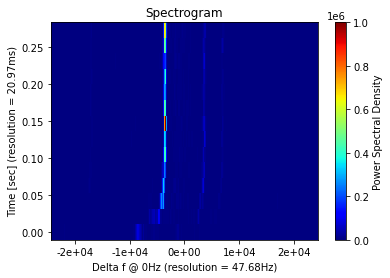

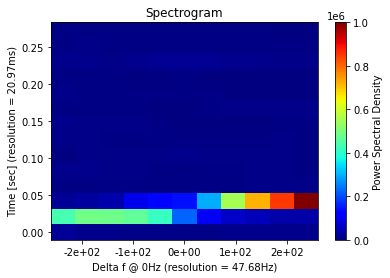

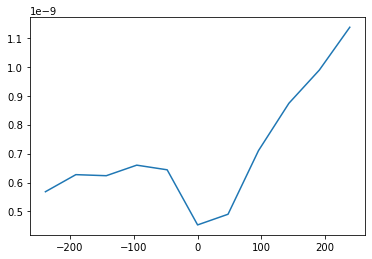

7.069082339322039e-10

In [294]:
iq = get_iq_object(filename)
iq.read_samples(1)
lframes=1024

time=0.3 #tdeath seconds of data                                                             
skip_time=5 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f] 
plot_spectrogram(xx,yy,zz)
plt.show()
nxx,nyy,nzz=get_cut_spectrogram(xx,yy,zz, xcen=-4.5e3,xspan=500)
plot_spectrogram(nxx,nyy,nzz)
plt.show()
axx,ayy,azz=get_averaged_spectrogram(nxx,nyy,nzz, len(nxx[:,0]))
plt.plot(axx[0,:], azz[0,:])
plt.show()
np.average(azz[0,:])

In [827]:
def do_it(filename, lframes, time, skip):
    iq = get_iq_object(filename)
    iq.read_samples(1)                                                          
    nframes=int(time*iq.fs/lframes)
    sframes=int(skip*iq.fs/lframes)
    iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
    iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
    xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f] 
    nxx,nyy,nzz=get_cut_spectrogram(xx,yy,zz, xcen=0e3, xspan=2000)
    return nxx,nyy,nzz
    #plot_spectrum(axx[0,:], azz[0,:], dbm=True)
    #np.average(azz[0,:])

In [831]:
def isomer_substract(f,l,t,s):
    xx,yy,zz=do_it(f,l,t,s)
    xx2,yy2,zz2=do_it(f,l,t,s+t)
    plot_spectrogram(xx,yy,zz)
    plt.show()
    plot_spectrogram(xx2,yy2,zz2)
    plt.show()
    nzz=zz-zz2
    plot_spectrogram(xx,yy,nzz)
    plt.show()
    axx,ayy,azz=get_averaged_spectrogram(xx,yy,nzz, len(xx[:,0]))
    plt.plot(axx[0,:], azz[0,:])
    plt.show()

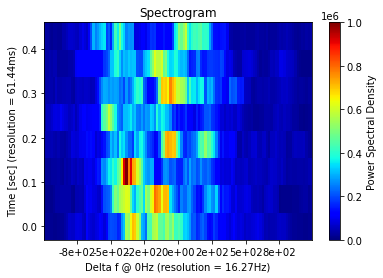

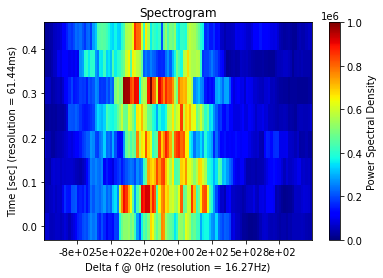

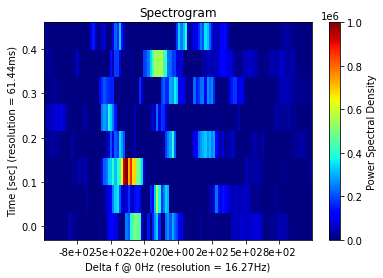

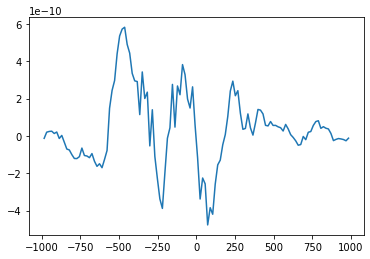

In [834]:
isomer_substract(filename2,3000,0.5,5.3)

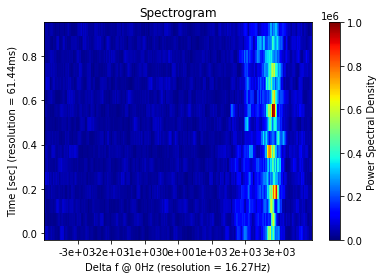

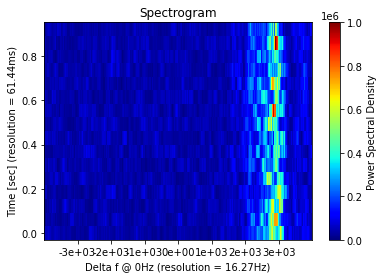

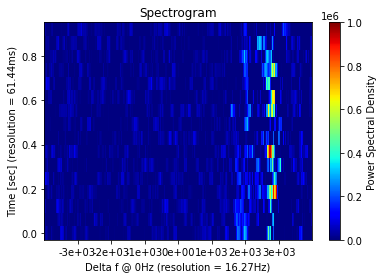

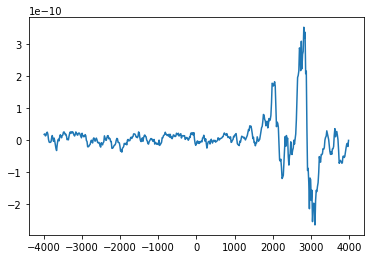

In [779]:
xx,yy,zz=do_it(filename_max,3000,1,6.525)
xx2,yy2,zz2=do_it(filename_max,3000,1,8.025)
plot_spectrogram(xx,yy,zz)
plt.show()
plot_spectrogram(xx2,yy2,zz2)
plt.show()
nzz=zz-zz2
plot_spectrogram(xx,yy,nzz)
plt.show()
axx,ayy,azz=get_averaged_spectrogram(xx,yy,nzz, len(xx[:,0]))
plt.plot(axx[0,:], azz[0,:])
plt.show()

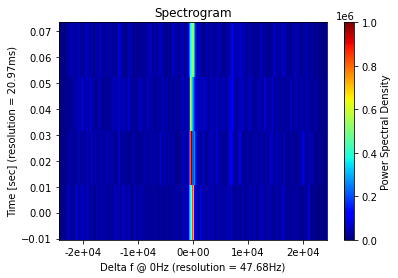

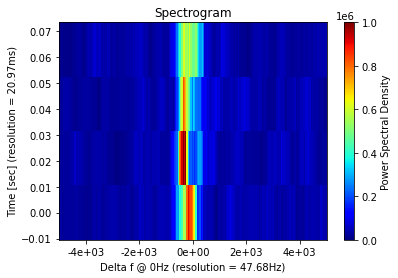

2.1417038173796153e-10

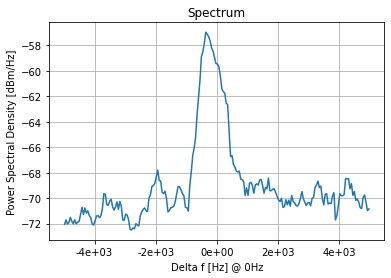

In [628]:
iq = get_iq_object(filename2)
iq.read_samples(1)
lframes=1024

time=0.1 #tdeath seconds of data                                                             
skip_time=5.3955 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f] 
plot_spectrogram(xx,yy,zz)
plt.show()
nxx,nyy,nzz=get_cut_spectrogram(xx,yy,zz, xcen=0, xspan=10000)
plot_spectrogram(nxx,nyy,nzz)
plt.show()
axx,ayy,azz=get_averaged_spectrogram(nxx,nyy,nzz, len(nxx[:,0]))
plot_spectrum(axx[0,:], azz[0,:], dbm=True)
np.average(azz[0,:])

(3.141074185287874e-10,
 array([[1.01999677e-10, 1.15383123e-10, 9.79240287e-11, ...,
         1.69208169e-10, 1.37274196e-10, 8.21878696e-11],
        [1.01657910e-10, 1.61770747e-10, 1.91710694e-10, ...,
         5.10174592e-11, 8.84187784e-11, 1.00317838e-10],
        [7.04975437e-11, 8.78114688e-11, 7.44611160e-11, ...,
         9.01538490e-11, 5.47765297e-11, 4.25525289e-11],
        ...,
        [3.46086746e-11, 2.88951086e-11, 3.16210200e-11, ...,
         1.24591319e-10, 9.19783133e-11, 9.55736257e-11],
        [1.01678842e-10, 6.25477467e-11, 6.25372454e-11, ...,
         8.74694714e-11, 8.18533158e-11, 7.80855981e-11],
        [8.90789555e-11, 9.57927780e-11, 7.95585348e-11, ...,
         7.19800197e-11, 7.06891731e-11, 3.95099953e-11]]))

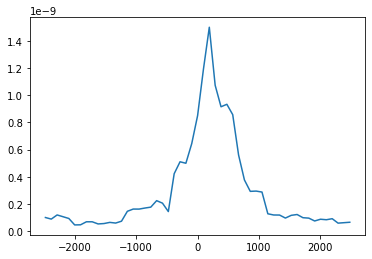

In [509]:
#iq = get_iq_object('/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.08.21.24.11.366.tiq' )
iq = get_iq_object('/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.07.06.55.25.448.tiq')

iq.read_samples(1)
lframes=512

time=1.00 #tdeath seconds of data                                                             
skip_time=5.025 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f]
nxx,nyy,nzz=get_cut_spectrogram2(xx,yy,zz, xcen=-6e2,xspan=5e3)
#plot_spectrum(nxx[0,:], nzz[0,:])
plt.plot(nxx[3,:], nzz[3,:])
np.average(nzz[1,:]), nzz

In [229]:
1.264862746482774e-09/7.452528993456048e-10

1.6972262001173437

7.956397483335217e-11

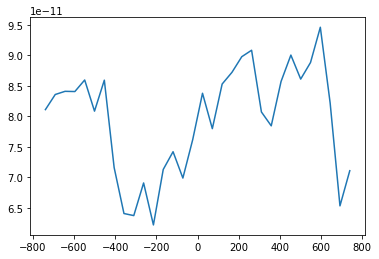

In [222]:
iq = get_iq_object('/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.08.21.24.11.366.tiq' )
iq.read_samples(1)
lframes=1024

time=0.15 #tdeath seconds of data                                                             
skip_time=7.025 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f] 
nxx,nyy,nzz=get_cut_spectrogram(xx,yy,zz, xcen=-7e3,xspan=1500)
axx,ayy,azz=get_averaged_spectrogram(nxx,nyy,nzz, len(nxx[:,0]))
plt.plot(axx[0,:], azz[0,:])
np.average(azz[0,:])

In [208]:
7.968079681823344e-11-1.0069927824451414e-09

-9.273119856269079e-10

In [209]:
-9.273119856269079e-10/7.968079681823344e-11

-11.63783524582814

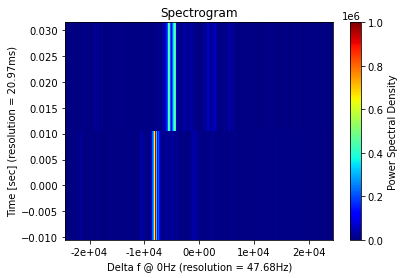

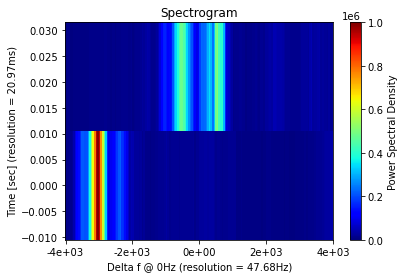

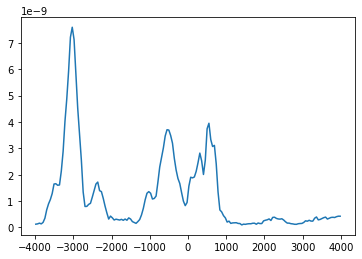

1.1908379192194838e-09

In [341]:
iq = get_iq_object('/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.08.21.29.31.962.tiq')
iq.read_samples(1)
lframes=1024

time=0.043 #tdeath seconds of data                                                             
skip_time=5.0 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f]
plot_spectrogram(xx,yy,zz)
plt.show()
nxx,nyy,nzz=get_cut_spectrogram(xx,yy,zz, xcen=-5e3,xspan=8000)
plot_spectrogram(nxx,nyy,nzz)
plt.show()
axx,ayy,azz=get_averaged_spectrogram(nxx,nyy,nzz, len(nxx[:,0]))
plt.plot(axx[0,:], azz[0,:])
plt.show()
np.average(azz[0,:])

In [387]:
def get_cut_spectrogram2(xx, yy, zz, xcen=None, xspan=None, ycen=None, yspan=None, invert=False):
    if not xspan:
        xspanmask = (xx[0, :] != 0) | (xx[0, :] == 0)
    else:
        xspanmask = (xx[0, :] <= xcen + xspan /
                     2) & (xx[0, :] >= xcen - xspan / 2)

    if not yspan:
        yspanmask = (yy[:, 0] != 0) | (yy[:, 0] == 0)
    else:
        yspanmask = (yy[:, 0] <= ycen + yspan /
                     2) & (yy[:, 0] >= ycen - yspan / 2)

    if invert:
        xspanmask = np.invert(xspanmask)
        yspanmask = np.invert(yspanmask)

    # need to create a new meshgrid due to cut, otherwise new data won't fit old mesh
    newz = zz[yspanmask][:, xspanmask]
    newx, newy = np.meshgrid(
        np.arange(np.shape(newz)[1]), np.arange(np.shape(newz)[0]))
    if np.shape(yy[:,0])[0]==1: delta_y=0
    else: delta_y = yy[1, 0] - yy[0, 0]
    newy = newy * delta_y
    delta_x = xx[0, 1] - xx[0, 0]
    newx = newx - newx[-1, -1] / 2
    newx = newx * delta_x

    return newx, newy, newz

# Bromine

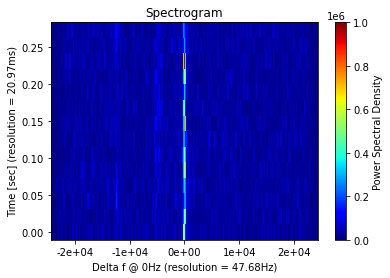

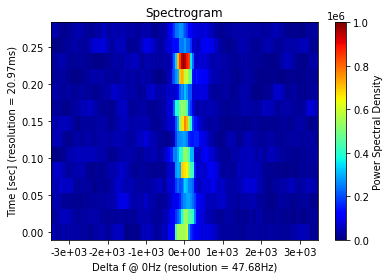

4.423371254638477e-09

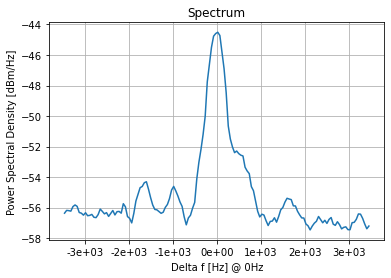

In [656]:
#Bromine
iq = get_iq_object('/lustre/ap/litv-exp/2021-07-03_E143_TwoPhotonDecay_ssanjari/analyzers/410/410MH\
z-2021.07.01.22.31.21.087.tiq')
iq.read_samples(1)
lframes=1024

time=0.3 #tdeath seconds of data                                                             
skip_time=1.1 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f] 
plot_spectrogram(xx,yy,zz)
plt.show()
nxx,nyy,nzz=get_cut_spectrogram(xx,yy,zz, xcen=0, xspan=7000)
plot_spectrogram(nxx,nyy,nzz)
plt.show()
axx,ayy,azz=get_averaged_spectrogram(nxx,nyy,nzz, len(nxx[:,0]))
plot_spectrum(axx[0,:], azz[0,:], dbm=True)
np.average(azz[0,:])